# Contents
1. [Introduction](#FEATURE_SCALING)
2. [Normalization](#Normalization)
3. [Standardization](#Standardization)

# FEATURE SCALING

<a id="Introduction"></a>

## Definition

Feature Scaling is a part of the feature engineering process. The purpose of applying Feature Scaling is to ensure that features with different scales are all on the same scale. This prevents one feature from dominating another and helps prevent bias in the model.

Feature Scaling is necessary when modeling with features that have different ranges.

We can examine the topic of Feature Scaling under three headings.





<a id="Normalization"></a>
 ### 1- Normalization (Min-Max Scaling)

    Normalization is a feature scaling technique used to compress the values in a dataset into a specific range, typically between 0 and 1. It is also known as Min-Max scaling.

    The formula for normalization is as follows:

$$
X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

    By applying this formula to all data points, the normalization process is completed.

    Some key points to consider:

    - It is sensitive to outliers.
    - The distribution of data is preserved after the normalization process.


#### Normalization Coding Practice

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Syntejetic data set
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.randint(0, 100, 100),
    'feature2': np.random.normal(0, 1, 100),
    'feature3': np.random.uniform(-1, 1, 100)
})
print(data.head())

   feature1  feature2  feature3
0        51 -1.346678  0.319968
1        92 -0.880591  0.634444
2        14 -1.130552  0.110402
3        71  0.134429  0.059301
4        60  0.582123 -0.516295


In [13]:
print(data['feature1'].min())
print(data['feature1'].max())
print(data['feature2'].min())
print(data['feature2'].max())
print(data['feature3'].min())
print(data['feature3'].max())



1
99
-2.65517604756347
3.372296253626673
-0.9898768323075626
0.9801077002085266


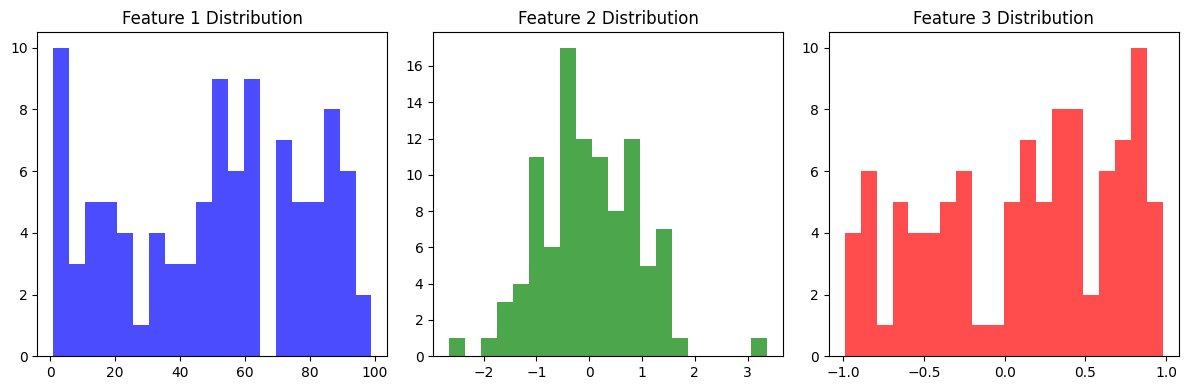

In [14]:
# Viz the data set
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data['feature1'], bins=20, color='b', alpha=0.7)
plt.title('Feature 1 Distribution')

plt.subplot(1, 3, 2)
plt.hist(data['feature2'], bins=20, color='g', alpha=0.7)
plt.title('Feature 2 Distribution')

plt.subplot(1, 3, 3)
plt.hist(data['feature3'], bins=20, color='r', alpha=0.7)
plt.title('Feature 3 Distribution')

plt.tight_layout()
plt.show()


    - As you can clearly see, the ranges of the features vary. We will perform feature scaling by applying normalization using the formula below to fit each feature into the 0-1 range.

In [15]:
#creating a function that complete future transformation
def min_max_normalize(data):
    normalized_data = (data - data.min()) / (data.max() - data.min())
    return normalized_data

In [18]:
nor_data = min_max_normalize(data)

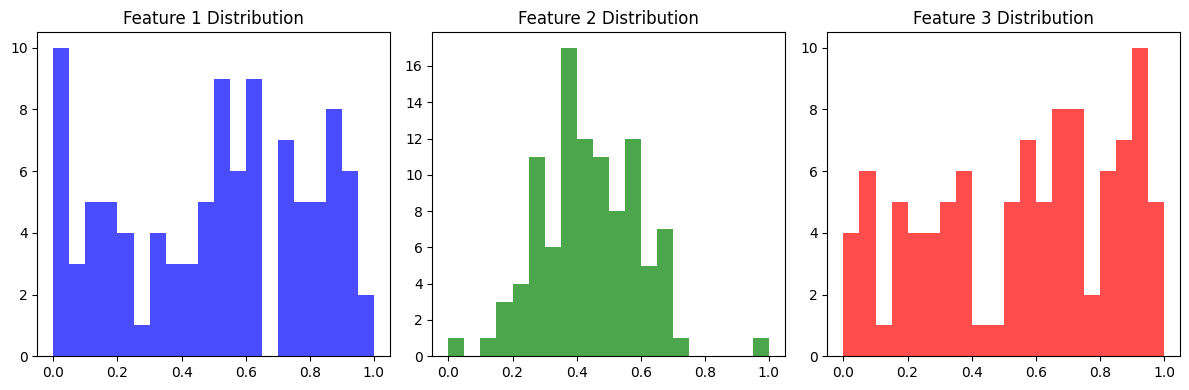

In [19]:
# viz the data set
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(nor_data['feature1'], bins=20, color='b', alpha=0.7)
plt.title('Feature 1 Distribution')

plt.subplot(1, 3, 2)
plt.hist(nor_data['feature2'], bins=20, color='g', alpha=0.7)
plt.title('Feature 2 Distribution')

plt.subplot(1, 3, 3)
plt.hist(nor_data['feature3'], bins=20, color='r', alpha=0.7)
plt.title('Feature 3 Distribution')

plt.tight_layout()
plt.show()


<a id="Standardization"></a>

 ### 2- Standardization (Z-score Scaling)

        Z-score is a statistical measure that indicates how many standard deviations a data point is away from the mean. It is used to understand the position and distribution of a value in a data set relative to the mean.

    *  Z-score is calculated using the following formula:
$$ Z = \frac{X - \mu}{\sigma} $$


  **How to interpret Z-score?**
   
    - Positive Z-score: The data point has a value above the mean. For example, a value with a z-score of 2 is located 2 standard deviations above the mean.

    - Negative Z-score: The data point has a value below the mean. For example, a value with a z-score of -1 is located 1 standard deviation below the mean.
    
    - Z-score of 0: The data point is equal to the mean.


 **How to use Z-score?**  


    - Anomaly Detection: Z-score can be used to detect outliers in a dataset. Typically, values with a z-score greater than 3 or less than -3 are considered outliers.
    
    -Data Comparison: Z-score can also be used to compare datasets coming from different distributions since all data points are expressed in the same scale.
    
    - Standardization: Z-score is utilized to standardize the values in a dataset, meaning that all values in the dataset are scaled to have a mean of 0 and a standard deviation of 1.

 **How to apply standardized (Z-score normalization)?** 

 - Standardization: Z-score is utilized to standardize the values in a dataset, meaning that all values in the dataset are scaled to have a mean of 0 and a standard deviation of 1.

to apply use below formula

$$ Z = \frac{X - \mu}{\sigma} $$




    1.step : calculate the mean
    2.step : calculate the std dev
    3.step : apply z-score formula for every data points.

#### Standardization Coding Practice

In [20]:
data.head(2)

,feature1,feature2,feature3
0,51,-1.346678,0.319968
1,92,-0.880591,0.634444


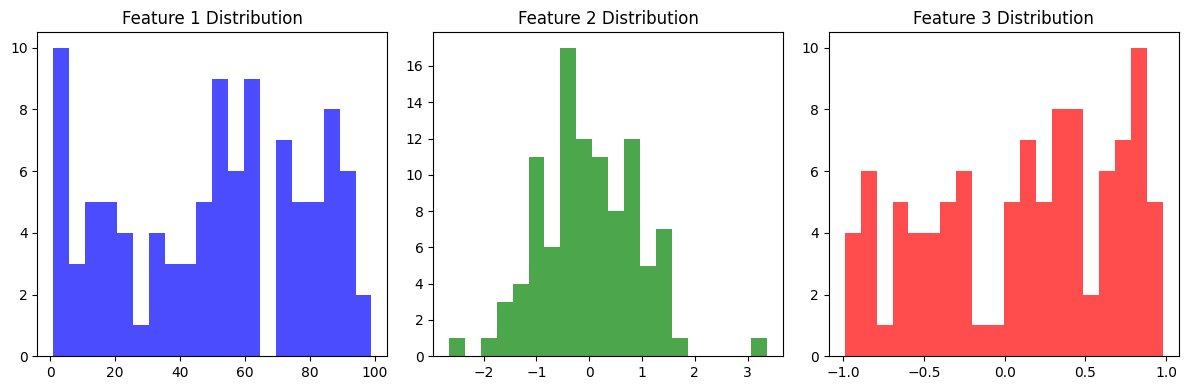

In [24]:
# Viz the data set
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data['feature1'], bins=20, color='b', alpha=0.7)
plt.title('Feature 1 Distribution')

plt.subplot(1, 3, 2)
plt.hist(data['feature2'], bins=20, color='g', alpha=0.7)
plt.title('Feature 2 Distribution')

plt.subplot(1, 3, 3)
plt.hist(data['feature3'], bins=20, color='r', alpha=0.7)
plt.title('Feature 3 Distribution')

plt.tight_layout()
plt.show()


In [22]:
def z_score_normalize(data):
    normalized_data = (data - data.mean()) / data.std()
    return normalized_data

In [26]:
z_data = z_score_normalize(data)
z_data

,feature1,feature2,feature3
0,0.015632,-1.447917,0.364811
1,1.408960,-0.948019,0.913845
2,-1.241761,-1.216113,-0.001065
3,0.695304,0.140634,-0.090280
4,0.321485,0.620805,-1.095197
...,...,...,...
95,1.137091,-0.176159,1.167985
96,0.967173,-0.419977,-0.759491
97,1.035140,-0.953297,-0.628244
98,0.049616,-0.386171,-1.611522


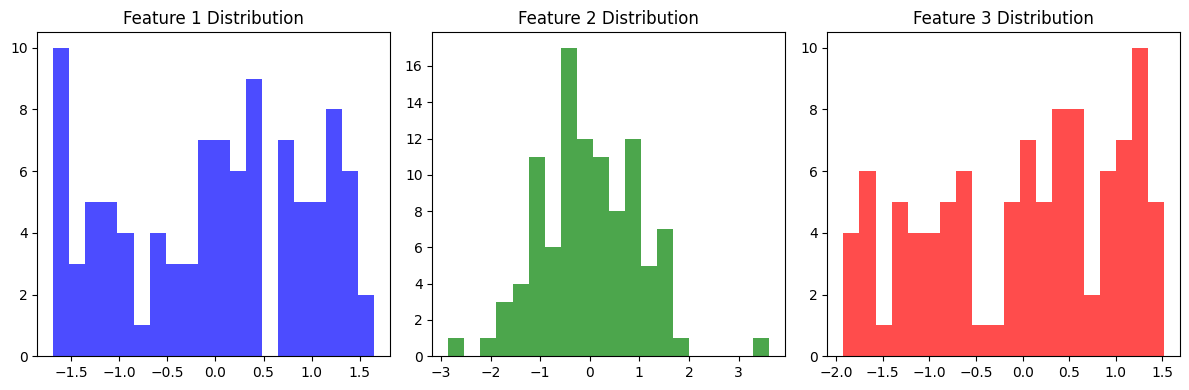

In [27]:
# Viz the data set
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(z_data['feature1'], bins=20, color='b', alpha=0.7)
plt.title('Feature 1 Distribution')

plt.subplot(1, 3, 2)
plt.hist(z_data['feature2'], bins=20, color='g', alpha=0.7)
plt.title('Feature 2 Distribution')

plt.subplot(1, 3, 3)
plt.hist(z_data['feature3'], bins=20, color='r', alpha=0.7)
plt.title('Feature 3 Distribution')

plt.tight_layout()
plt.show()


In [35]:
print(round(z_data['feature1'].mean()))
print(round(z_data['feature2'].mean()))
print(round(z_data['feature3'].mean()))

0
0
0


In [36]:
print(z_data['feature1'].std())
print(z_data['feature2'].std())
print(z_data['feature3'].std())

1.0
0.9999999999999998
0.9999999999999999


#                                          THE BIG QUESTION -- Normalize or Standardize

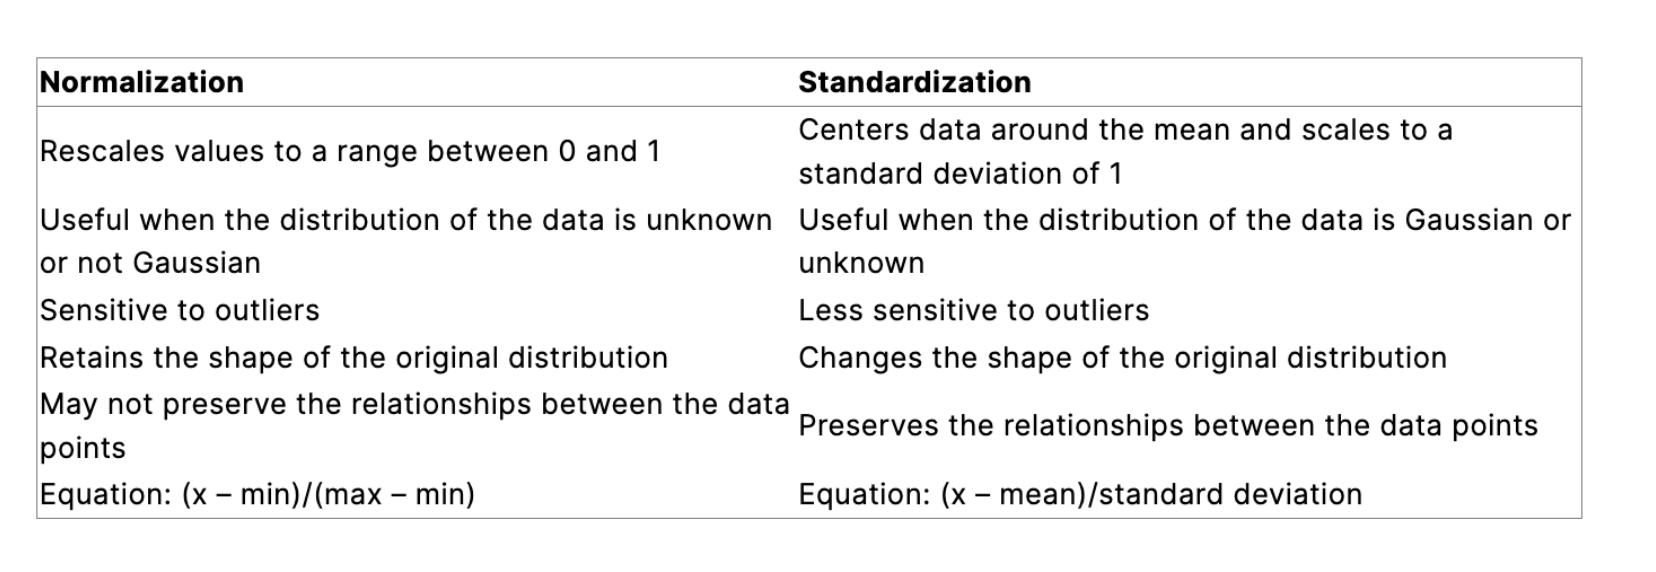

“Feature Scaling for Machine Learning: Understanding the Difference Between Normalization and Standardization.” Analytics Vidhya, 15 Nisan 2020, https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/.
